In [1]:
import tensorflow as tf
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
from tensorflow import keras
from keras import Sequential
from keras.layers import Conv2D, MaxPooling2D, Flatten, Dense
from keras import datasets, layers, models

In [2]:
(X_train, y_train), (X_test, y_test) = datasets.mnist.load_data()

11490434/11490434 ━━━━━━━━━━━━━━━━━━━━ 0s 0us/step


In [3]:
len(X_train)

60000

In [4]:
len(X_test)

10000

In [5]:
X_train = X_train/255
X_test = X_test/255

In [8]:
y_train = tf.keras.utils.to_categorical(y_train)
y_test = tf.keras.utils.to_categorical(y_test)

In [9]:
y_train[0]

array([0., 0., 0., 0., 0., 1., 0., 0., 0., 0.])

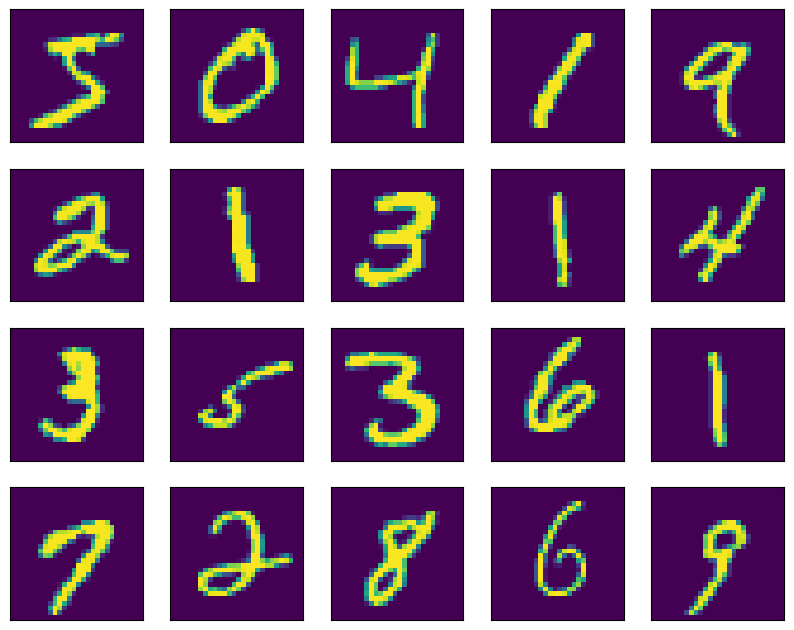

In [7]:
plt.figure(figsize=(10,10))
for i in range(20):
  plt.subplot(5,5,i+1)
  plt.xticks([])
  plt.yticks([])
  plt.grid(False)
  plt.imshow(X_train[i])
plt.show()

In [12]:
model = models.Sequential()
model.add(layers.Conv2D(32, (3,3),activation='relu',input_shape=(28,28,1)))
model.add(layers.MaxPooling2D((2,2)))
model.add(layers.Conv2D(64, (3,3), activation='relu'))
model.add(layers.MaxPooling2D((2,2)))
model.add(layers.Flatten())
model.add(layers.Dense(64, activation='relu'))
model.add(layers.Dense(10, activation='softmax'))

model.summary()

Model: "sequential_1"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ conv2d_1 (Conv2D)                    │ (None, 26, 26, 32)          │             320 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling2d_1 (MaxPooling2D)       │ (None, 13, 13, 32)          │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d_2 (Conv2D)                    │ (None, 11, 11, 64)          │          18,496 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling2d_2 (MaxPooling2D)       │ (None, 5, 5, 64)            │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ flatten (Flatten)                    │ (None, 1600)                │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense (Dense)                        │ (None, 64)                  │         102,464 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_1 (Dense)                      │ (None, 10)                  │             650 │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 121,930 (476.29 KB)

 Trainable params: 121,930 (476.29 KB)

 Non-trainable params: 0 (0.00 B)

In [13]:
model.compile(
    optimizer="adam",
    loss = "binary_crossentropy",
    metrics = ["accuracy"]
)

In [15]:
model.fit(X_train,y_train, epochs=10, batch_size=100, validation_data=(X_test, y_test))

Epoch 1/10
600/600 ━━━━━━━━━━━━━━━━━━━━ 44s 72ms/step - accuracy: 0.9356 - loss: 0.0475 - val_accuracy: 0.9806 - val_loss: 0.0152
Epoch 2/10
600/600 ━━━━━━━━━━━━━━━━━━━━ 44s 74ms/step - accuracy: 0.9797 - loss: 0.0152 - val_accuracy: 0.9861 - val_loss: 0.0106
Epoch 3/10
600/600 ━━━━━━━━━━━━━━━━━━━━ 44s 74ms/step - accuracy: 0.9876 - loss: 0.0102 - val_accuracy: 0.9882 - val_loss: 0.0083
Epoch 4/10
600/600 ━━━━━━━━━━━━━━━━━━━━ 83s 75ms/step - accuracy: 0.9897 - loss: 0.0080 - val_accuracy: 0.9909 - val_loss: 0.0071
Epoch 5/10
600/600 ━━━━━━━━━━━━━━━━━━━━ 82s 75ms/step - accuracy: 0.9922 - loss: 0.0062 - val_accuracy: 0.9893 - val_loss: 0.0070
Epoch 6/10
600/600 ━━━━━━━━━━━━━━━━━━━━ 89s 87ms/step - accuracy: 0.9927 - loss: 0.0054 - val_accuracy: 0.9906 - val_loss: 0.0064
Epoch 7/10
600/600 ━━━━━━━━━━━━━━━━━━━━ 73s 72ms/step - accuracy: 0.9940 - loss: 0.0046 - val_accuracy: 0.9913 - val_loss: 0.0062
Epoch 8/10
600/600 ━━━━━━━━━━━━━━━━━━━━ 82s 72ms/step - accuracy: 0.9955 - loss: 0.0038 - 

In [16]:
model.evaluate(X_test, y_test)

313/313 ━━━━━━━━━━━━━━━━━━━━ 2s 7ms/step - accuracy: 0.9876 - loss: 0.0085


[0.006614434998482466, 0.9909999966621399]

In [18]:
y_pred = model.predict(X_test)
y_pred[0]


313/313 ━━━━━━━━━━━━━━━━━━━━ 2s 6ms/step


array([4.0264098e-16, 3.7027886e-14, 1.3036868e-14, 1.9630042e-12,
       1.8870907e-15, 7.2111621e-18, 5.8726178e-25, 9.9999994e-01,
       1.0006896e-17, 5.2771148e-15], dtype=float32)

In [35]:
yp=model.predict(X_test)
yp = np.argmax(yp[2])
yp

313/313 ━━━━━━━━━━━━━━━━━━━━ 2s 6ms/step


1

In [36]:
y_test[2]

array([0., 1., 0., 0., 0., 0., 0., 0., 0., 0.])

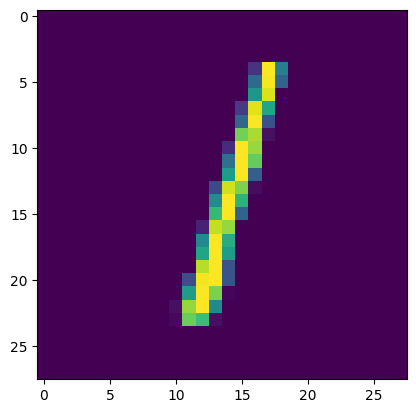

In [34]:
plt.imshow(X_test[2])